# Estimating Test Metrics for Classification

In [28]:
import pandas as pd

## Tissue samples

Recall the setup from the previous notebook. Electrical signals can be used to detect if tissue is cancerous. The goal is to determine whether a sample of breast tissue is:

- adipose tissue ("adi")
- carcinoma ("car")
- connective tissue ("con")
- fibro-adenoma ("fad")
- glandular tissue ("gla")
- mastopathy ("mas")

The training data consists of the results of scans for 106 tissue samples for which the above tissue class is known. We will focus on two features:

- I0: impedivity at 0 kHz,
- PA500: phase angle at 500 kHz

In [29]:
df_train = pd.read_csv("http://dlsun.github.io/stats112/data/BreastTissue.csv")
df_train

,Case #,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...,...
101,102,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
102,103,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
103,104,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534
104,105,adi,2300.000000,0.045029,0.136834,185.446044,5086.292497,27.427344,178.691742,49.593290,2480.592151


In the previous notebook we plotted the training data.

In [30]:
import plotly.express as px

px.scatter(df_train,
           x="I0",
           y="PA500",
           color="Class",
           title = "Observed class")

We also fit a 5-nearest neighbors classification model.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

X_train = df_train[["I0", "PA500"]]
y_train = df_train["Class"]

knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5))

knn_model.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

We can use the model to predict the tissue class for all the observations in the training data, and plot the predicted tissue classes. Compare (visually) to the observed tissue classes.

In [32]:
df_train["knn_predict"] = knn_model.predict(X_train)

px.scatter(df_train,
           x="I0",
           y="PA500",
           color="knn_predict",
           title="Predicted class from 5-nearest neighbors model")

1\. Use 5-fold cross validation to estimate the *test* precision, recall, and F1 score for the carcinoma ("car") class. Compare to the training precision, recall, and F1 score (from the previous notebook).

In [33]:
from sklearn.model_selection import cross_val_score

prec_scores = cross_val_score(
    knn_model,
    X_train,
    y_train == "car",
    cv=5,
    scoring="precision"
)

rec_scores = cross_val_score(
    knn_model,
    X_train,
    y_train == "car",
    cv=5,
    scoring="recall"
)

f1_scores = cross_val_score(
    knn_model,
    X_train,
    y_train == "car",
    cv=5,
    scoring="f1"
)

print("Precision:", prec_scores.mean())
print("Recall:", rec_scores.mean())
print("F1:", f1_scores.mean())

Precision: 0.9
Recall: 0.8
F1: 0.838095238095238


From the previous notebook it seems that these values are lower. This is because in the previous notebook we used the training data to estimate the test metrics. In this case, the model was tested on data that was not seen during training, so the test metrics are a better estimate of how the model will perform on new data.

2\. Use 5-fold cross validation to estimate the *test* precision, recall, and F1 score for the mastopathy ("mas") class. Compare to the training precision, recall, and F1 score (from the previous notebook).

You might get a warning "Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior." Try to figure out why the warning is happening and what it means.

In [34]:
prec_scores = cross_val_score(
    knn_model,
    X_train,
    y_train == "mas",
    cv=5,
    scoring="precision",
)

rec_scores = cross_val_score(
    knn_model,
    X_train,
    y_train == "mas",
    cv=5,
    scoring="recall"
)

f1_scores = cross_val_score(
    knn_model,
    X_train,
    y_train == "mas",
    cv=5,
    scoring="f1"
)

print("Precision:", prec_scores.mean())
print("Recall:", rec_scores.mean())
print("F1:", f1_scores.mean())

Precision: 0.07777777777777777
Recall: 0.2
F1: 0.11111111111111112


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



3\. Nearest neighbors is one classification algorithm, but there are many others, including **decision tree classifiers**. We won't cover details of how decision trees work, but let's fit one using `DecisionTreeClassifier` from scikit-learn.

Fit a decision tree classifier for predicting tissue class from the two features. Note: with decision trees, you don't need to scale the features. Hint: you basically just need to replace with `KNeighborsClassifier()` with `DecisionTreeClassifier()`.

In [35]:
from sklearn.tree import DecisionTreeClassifier

d_tree = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier())

d_tree.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

4\. Plot the predicted classes from the decision tree model. Compare (visually) to the plot of the predicted classes from the nearest neighbors model.

In [36]:
df_train["d_tree_predict"] = d_tree.predict(X_train)

px.scatter(df_train,
           x="I0",
           y="PA500",
           color="d_tree_predict",
           title="Predicted class from DecisionTree model")

5\. Use 5-fold cross validation to estimate the *test* precision, recall, and F1 score for the carcinoma ("car") class for the decision tree. Compare to the test precision, recall, and F1 score from the nearest neighbors model. Which model is more successful at predicting the carcinoma class?

In [37]:
prec_scores = cross_val_score(
    d_tree,
    X_train,
    y_train == "car",
    cv=5,
    scoring="precision",
)

rec_scores = cross_val_score(
    d_tree,
    X_train,
    y_train == "car",
    cv=5,
    scoring="recall"
)

f1_scores = cross_val_score(
    d_tree,
    X_train,
    y_train == "car",
    cv=5,
    scoring="f1"
)

print("Precision:", prec_scores.mean())
print("Recall:", rec_scores.mean())
print("F1:", f1_scores.mean())

Precision: 0.8
Recall: 0.7
F1: 0.7341991341991342


KNN model is more successful at predicting the carcinoma class.

6\. Use 5-fold cross validation to estimate the *test* precision, recall, and F1 score for the mastopathy ("mas") class for the decision tree. Compare to the test precision, recall, and F1 score from the nearest neighbors model. Which model is more successful at predicting the mastopathy class?

In [38]:
prec_scores = cross_val_score(
    d_tree,
    X_train,
    y_train == "mas",
    cv=5,
    scoring="precision",
)

rec_scores = cross_val_score(
    d_tree,
    X_train,
    y_train == "mas",
    cv=5,
    scoring="recall"
)

f1_scores = cross_val_score(
    d_tree,
    X_train,
    y_train == "mas",
    cv=5,
    scoring="f1"
)

print("Precision:", prec_scores.mean())
print("Recall:", rec_scores.mean())
print("F1:", f1_scores.mean())

Precision: 0.11636363636363636
Recall: 0.25
F1: 0.13931623931623932


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Here the decision tree model is more successful at predicting the mastopathy class.

## More wine

The wines data set (https://dlsun.github.io/pods/data/wines.csv ) contains data about the chemical composition of various wines. We'll use just two features&mdash;fixed acidity and volatile acidity&mdash;to predict the color of the wine (red or white).

In [39]:
df_train = pd.read_csv("https://dlsun.github.io/pods/data/wines.csv")

df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [40]:
px.scatter(df_train,
           x="fixed acidity",
           y="volatile acidity",
           color="color",
           color_discrete_map = {'red': 'red', 'white': 'blue'},
           opacity = 0.2,
           title = "Observed wine color")

1\. Fit a 15-nearest neighbors model for predicting color from fixed acidity and volatile acidity. Don't forget to scale the features. Create a scatter plot of the predicted wine colors for the training data, and compare visually to the observed colors.

In [41]:
# YOUR CODE HERE

X_train = df_train[["fixed acidity", "volatile acidity"]]
y_train = df_train["color"]

knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=15))

knn_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=15))])

In [42]:
df_train["knn_predict"] = knn_model.predict(X_train)

px.scatter(df_train,
           x="fixed acidity",
           y="volatile acidity",
           color="knn_predict",
           title="Predicted class from 15-nearest neighbors model",
           opacity=0.2)

2\. Use 10-fold cross-validation to estimate the test precision, recall, and F1 score using `macro` scoring.

In [43]:
precision_macro = cross_val_score(knn_model, X_train, y_train,
                                  cv=10, scoring="precision_macro").mean()

recall_macro = cross_val_score(knn_model, X_train, y_train,
                               cv=10, scoring="recall_macro").mean()

f1score_macro = cross_val_score(knn_model, X_train, y_train,
                                cv=10, scoring="f1_macro").mean()

precision_macro, recall_macro, f1score_macro

(0.8813805542523216, 0.8543688286606457, 0.8632968326738716)

3\. Use `GridSearchCV` to fit $k$-nearest neighbors models for $k=1,\ldots, 30$ and use cross validation to estimate the test F1 macro score. Plot the test score versus $k$. Which value of $k$ yields the best score?

In [44]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    knn_model,
    param_grid={"kneighborsclassifier__n_neighbors": range(1, 30)},
    scoring="f1_macro",
    cv=10
)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'kneighborsclassifier__n_neighbors': 16}

<Axes: title={'center': 'F1 score vs. k'}, xlabel='k', ylabel='F1 score'>

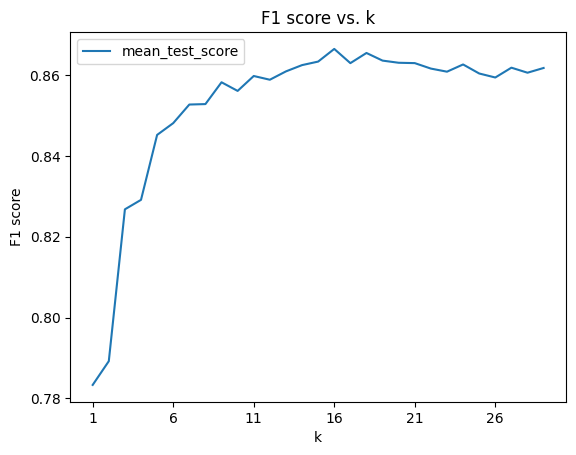

In [45]:
# plot test scores versus k here using plotly express

pd.DataFrame(grid_search.cv_results_).plot(
    x="param_kneighborsclassifier__n_neighbors",
    y="mean_test_score",
    title="F1 score vs. k",
    xlabel="k",
    ylabel="F1 score")


k = 16 yields the best score.

4\. When the target variable is binary **logistic regression** provides another classification algorithm.

Fit a logistic regression model for predicting wine color from the two features. Create a scatter plot of the predicted wine colors for the training data, and compare visually to the predictions from the nearest neighbors classifier.

Note: with regression, you don't need to scale the features. Hint: you basically just need to replace with `KNeighborsClassifier()` with `LogisticRegression()`.

In [46]:
from sklearn.linear_model import LogisticRegression

# YOUR CODE HERE

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

df_train["logistic_predict"] = logistic_model.predict(X_train)

px.scatter(df_train,
              x="fixed acidity",
              y="volatile acidity",
              color="logistic_predict",
              title="Predicted class from logistic model",
              opacity=0.2)

5\. Use 10-fold cross-validation to estimate the test precision, recall, and F1 score of the logistic regression model using `macro` scoring. Compare to the nearest neighbors model.

In [47]:
precision_macro = cross_val_score(logistic_model, X_train, y_train,
                                    cv=10, scoring="precision_macro").mean()

recall_macro = cross_val_score(logistic_model, X_train, y_train,
                                    cv=10, scoring="recall_macro").mean()

f1score_macro = cross_val_score(logistic_model, X_train, y_train,
                                    cv=10, scoring="f1_macro").mean()

precision_macro, recall_macro, f1score_macro

(0.8926197528116662, 0.8450644802717939, 0.8604201106403506)

These 2 models are very similar, but the KNN model is slightly better in terms of the F1 score and recall.

6\. Fit an ensemble model that combines the two models (kNN and logistic) using voting.

Hint: the code is almost identical to what we did for `VotingRegressor`.

In [48]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier([
    ("knn", knn_model),
    ("logistic", logistic_model)
])

ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('knn',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(n_neighbors=15))])),
                             ('logistic', LogisticRegression())])

7\. Use 10-fold cross validation to estimate the test macro precision, recall, and F1 score of the ensemble model. Compare the values to the correspoding values from the individual models.

In [49]:
precision_macro = cross_val_score(ensemble_model, X_train, y_train,
                                    cv=10, scoring="precision_macro").mean()

recall_macro = cross_val_score(ensemble_model, X_train, y_train,
                                    cv=10, scoring="recall_macro").mean()

f1score_macro = cross_val_score(ensemble_model, X_train, y_train,
                                    cv=10, scoring="f1_macro").mean()

precision_macro, recall_macro, f1score_macro

(0.8776092942836531, 0.860284267949569, 0.8647512542112924)

This ensemble model has the best F1 score from both of the individual models, which demonstrates it has great overall performance.